In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [14]:
from Scripts.Individual import Individual
from Scripts.Parameters import mu, m, pa
from Scripts.Polarity import polarity
from Scripts.Memory import initialize_memory, probability_distribution, A
from Scripts.Model import Model, evaluateModel, simulate
from Scripts.Entropy import empirical_entropy, JSD
from Scripts.Types import List
# from multiprocessing import Pool
from time import time

import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
from copy import deepcopy
import itertools

from Plotting import simplePlot, heat_plot

In [173]:
T = 500
X = range(T)
k = [0, 10, 15, 20, 25]

In [366]:
def getFigure_H_WtPolariz(kappas, gamma):
    name = 'Outputs/Stats - k in {} - gamma = {}'.format(kappas, gamma)

    with open(name, "rb") as input_file:
        stats = pickle.load(input_file)

    fig, ax = simplePlot((10, 8), x_label = 't', y_label = r'$\overline{H}$', title = r'$\gamma = {}$'.format(gamma), x_label_size = 20, y_label_size = 20, title_size = 25,
                        x_tick_label_size = 15, y_tick_label_size = 15)
    for k in stats.keys():
        ax.plot(X, stats[str(k)], label = r'$\kappa$ = {}'.format(k), linewidth = 5)
    plt.legend(fontsize = 15, loc = 2)
    
    fig.savefig('Outputs/Figuras/Stats - k in {} - gamma = {}.png'.format(kappas, gamma), dpi = 50)
    
def getStats_OpSpread_WtPolariz(kappas, gamma):
    name = 'Outputs/Opinion Spread - k in {} - gamma = {}'.format(kappas, gamma)

    with open(name, "rb") as input_file:
        stats = pickle.load(input_file)

    return stats

def getStats_OpFrag_WtPolariz(kappas, gamma):
    name = 'Outputs/Opinion Fragmentation - k in {} - gamma = {}'.format(kappas, gamma)

    with open(name, "rb") as input_file:
        stats = pickle.load(input_file)

    return stats

In [364]:
gamma = 5
statistics = getStats_OpSpread_WtPolariz(k, gamma)

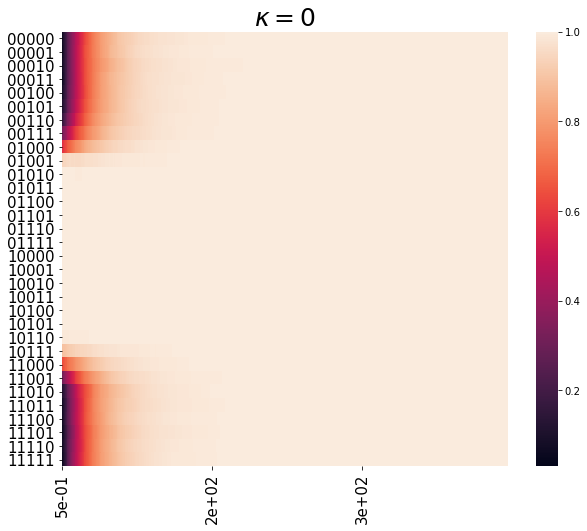

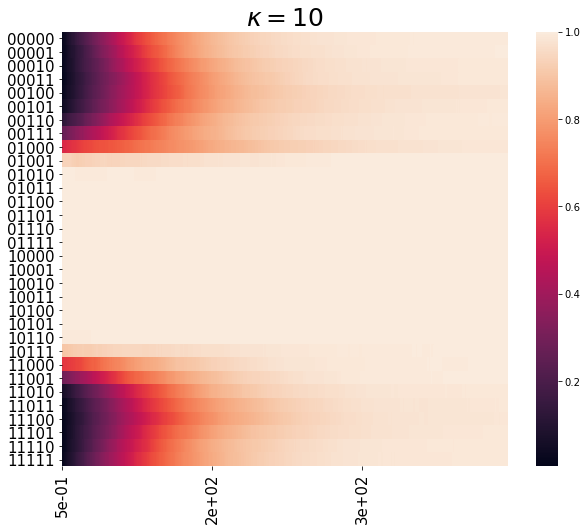

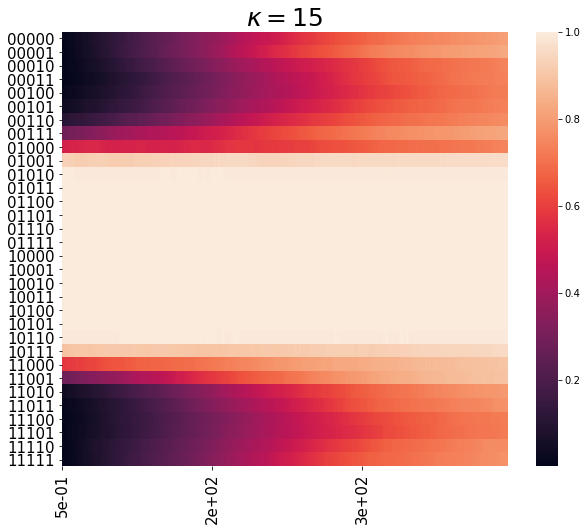

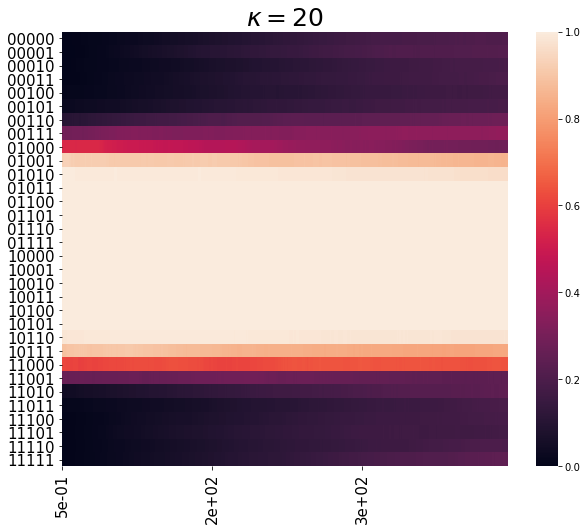

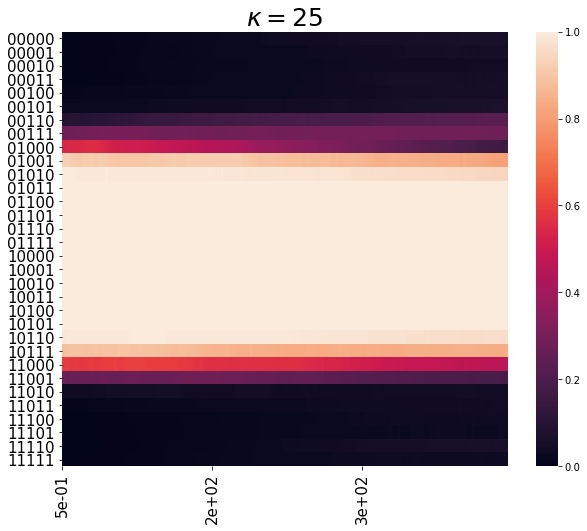

In [365]:

for kappa in ['0', '10', '15', '20', '25']:
    a = statistics[kappa]
    evolution = []
    for code in a.keys():
        evolution.append(a[code])

    evolution = np.asarray(evolution)

    fig, ax = heat_plot(evolution, size = (10, 8), y_tick_labels = a.keys(), x_tick_label_size = 15,
                        y_tick_label_size = 15, title = r'$\kappa = {}$'.format(kappa), title_size = 25)

    fig.savefig('Outputs/Figuras/Opinion Spread - K = {} - gamma = {}'.format(kappa, gamma), dpi = 50)

In [373]:
kappas = [0, 10, 15, 20, 25]
gamma = 0
statistics = getStats_OpFrag_WtPolariz(kappas, gamma)

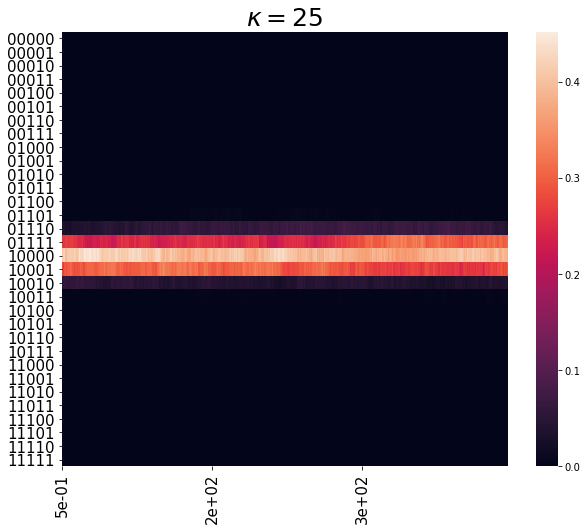

In [381]:
kappa = str(25)
a = statistics[kappa]
evolution = []
for code in a.keys():
    evolution.append(a[code])

evolution = np.asarray(evolution)

fig, ax = heat_plot(evolution, size = (10, 8), y_tick_labels = a.keys(), x_tick_label_size = 15,
                    y_tick_label_size = 15, title = r'$\kappa = {}$'.format(kappa), title_size = 25)

In [53]:
def teste(proportions, l, k):
    name = 'Outputs/Stats - (alpha, omega) in {} - lambda = {} - kappa = {}'.format(proportions, l, k)

    with open(name, "rb") as input_file:
        stats = pickle.load(input_file)

    H = stats['H']
    fig, ax = simplePlot((10, 8), x_label = 't', y_label = r'$\overline{H}$', title = r'$\kappa = {}, \lambda = {}$'.format(k, l), 
                         x_label_size = 20, y_label_size = 20, title_size = 25,
                         x_tick_label_size = 15, y_tick_label_size = 15)
    for i in H.keys():
        ax.plot(X, H[str(i)], label = r'$(\alpha, \omega)$ = {}'.format(i), linewidth = 4)
    plt.legend()
    
    fig.savefig('Outputs/Figuras/Entropy - (alpha, omega) = {} - lambda = {} - kappa = {}.png'.format(proportions, l, k), dpi = 50)

In [19]:
def teste2(proportions, lambd, kappa):
    name = 'Outputs/Opinion Fragmentation - (alpha, omega) in {} - lambda = {} - kappa = {}'.format(proportions, lambd, kappa)

    with open(name, "rb") as input_file:
        stats = pickle.load(input_file)
        
    return stats

In [65]:
T = 1000
X = range(T)

In [66]:
# proportions = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1), (1.0, 0.0)]
# proportions = [(0.6, 0.0), (0.5, 0.1), (0.4, 0.2), (0.3, 0.3)]
proportions = [(0.7, 0.0), (0.6, 0.1), (0.5, 0.2), (0.4, 0.3)]
lambd = [0]
kappa = [0, 10, 15]

In [29]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [136]:
statistics_for_kappa__1 = pickle.load(open(f"stats - gamma = {-1}.pickle", "rb"))
statistics_for_kappa_0 = pickle.load(open(f"stats - gamma = {0}.pickle", "rb"))
statistics_for_kappa_1 = pickle.load(open(f"stats - gamma = {1}.pickle", "rb"))

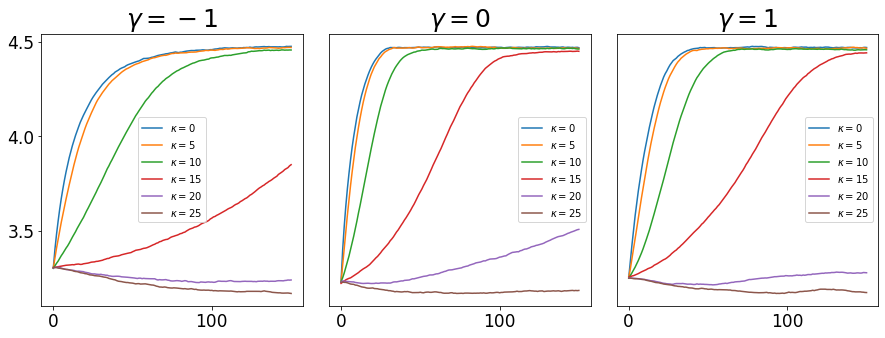

In [139]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
axs[1].set_yticks([])
axs[2].set_yticks([])

for i in range(3):
    axs[i].locator_params('x', nbins = 3)
    axs[i].locator_params('y', nbins = 3)
    axs[i].xaxis.set_tick_params(labelsize = 17)
    axs[i].yaxis.set_tick_params(labelsize = 17)
    
kappas = [0, 5, 10, 15, 20, 25]
T = 150
N = 3

for kappa in kappas:
    mean_curve = np.asarray(statistics_for_kappa__1[kappa][1]).mean(axis = 0)
    axs[0].plot(range(T+1), mean_curve, label = r"$\kappa = {}$".format(kappa))
    mean_curve = np.asarray(statistics_for_kappa_0[kappa][1]).mean(axis = 0)
    axs[1].plot(range(T+1), mean_curve, label = r"$\kappa = {}$".format(kappa))
    mean_curve = np.asarray(statistics_for_kappa_1[kappa][1]).mean(axis = 0)
    axs[2].plot(range(T+1), mean_curve, label = r"$\kappa = {}$".format(kappa))
    
axs[0].set_title(r"$\gamma = -1$", fontsize = 25)    
axs[0].legend()

axs[1].set_title(r"$\gamma = 0$", fontsize = 25)
axs[1].legend()

axs[2].set_title(r"$\gamma = 1$", fontsize = 25)
axs[2].legend()

fig.savefig('entropy.png', bbox_inches = 'tight')

In [62]:
from typing import Tuple, List, NewType
import matplotlib
import seaborn as sns
import matplotlib.ticker as mtick
Figure = NewType('Figure', matplotlib.figure.Figure)
Axis   = NewType('Axis', matplotlib.axes.Axes)

In [70]:
def heat_plot(X: np.array, size: Tuple[int],
              x_tick_label_size: int,
              y_tick_label_size: int,
              title: str,
              title_size: int,
              x_tick_labels: List[str] = None,
              y_tick_labels: List[str] = None,
              y_tick_rotation: str = 'horizontal',
              cmap: str = None,
              fig = None,
              ax = None,
              cbar = True) -> Tuple[Figure, Axis]:
    
    sns.heatmap(X, linewidth = 0, ax = ax, cmap = cmap, cbar = cbar)
    
    ax.locator_params('x', nbins = 3)
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    
    if x_tick_labels != None:
        ax.set_xticklabels(x_tick_labels)
    if y_tick_labels != None:
        ax.set_yticklabels(y_tick_labels, rotation = y_tick_rotation)
    else:
        ax.set_yticks([])
        
    ax.tick_params(axis = 'x', which = 'both', labelsize = x_tick_label_size)
    ax.tick_params(axis = 'y', which = 'both', labelsize = y_tick_label_size)
    
    ax.set_title(title, size = title_size)
    
    return fig, ax

In [ ]:
s

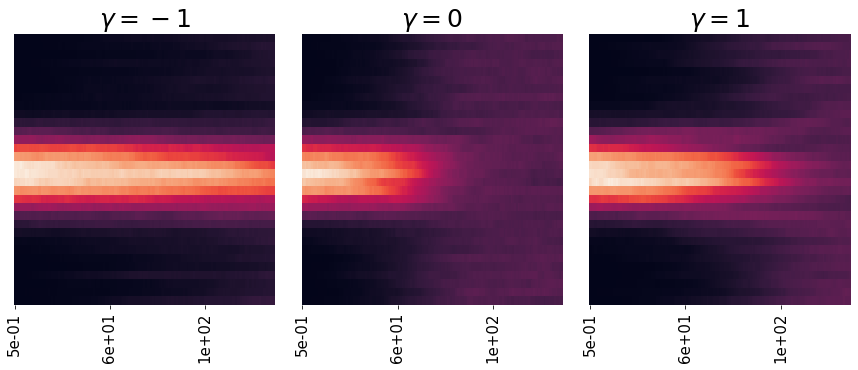

In [140]:
kappa = 15

fig, axs = plt.subplots(1, 3, figsize = (15, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
axs[1].set_yticks([])
axs[2].set_yticks([])

for i in range(3):
    axs[i].locator_params('x', nbins = 3)
    axs[i].xaxis.set_tick_params(labelsize = 17)
    axs[i].yaxis.set_tick_params(labelsize = 17)
    
a = statistics_for_kappa__1[kappa][0]
evolution = []
for code in a.keys():
    evolution.append(a[code])
evolution = np.asarray(evolution)    
heat_plot(evolution, size = (10, 8), y_tick_labels = None, x_tick_label_size = 15,
                    y_tick_label_size = 15, title = r'$\gamma = {}$'.format(-1), title_size = 25, fig = fig, ax = axs[0], cbar = False)    
    
a = statistics_for_kappa_0[kappa][0]
evolution = []
for code in a.keys():
    evolution.append(a[code])
evolution = np.asarray(evolution)    
heat_plot(evolution, size = (10, 8), y_tick_labels = None, x_tick_label_size = 15,
                    y_tick_label_size = 15, title = r'$\gamma = {}$'.format(0), title_size = 25, fig = fig, ax = axs[1], cbar = False)

a = statistics_for_kappa_1[kappa][0]
evolution = []
for code in a.keys():
    evolution.append(a[code])
evolution = np.asarray(evolution)    
heat_plot(evolution, size = (10, 8), y_tick_labels = None, x_tick_label_size = 15,
                    y_tick_label_size = 15, title = r'$\gamma = {}$'.format(1), title_size = 25, fig = fig, ax = axs[2], cbar = False)

fig.savefig("distribution.png", bbox_inches = 'tight')

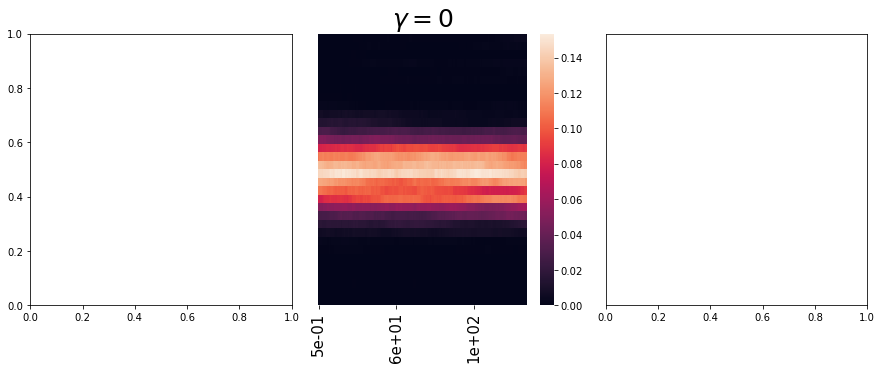

In [116]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
axs[1].set_yticks([])
axs[2].set_yticks([])

a = statistics_for_kappa_0[kappa][0]
evolution = []
for code in a.keys():
    evolution.append(a[code])
evolution = np.asarray(evolution)    
heat_plot(evolution, size = (10, 8), y_tick_labels = None, x_tick_label_size = 15,
                    y_tick_label_size = 15, title = r'$\gamma = {}$'.format(0), title_size = 25, fig = fig, ax = axs[1], cbar = True)

fig.savefig("color_map.png", bbox_inches = 'tight')

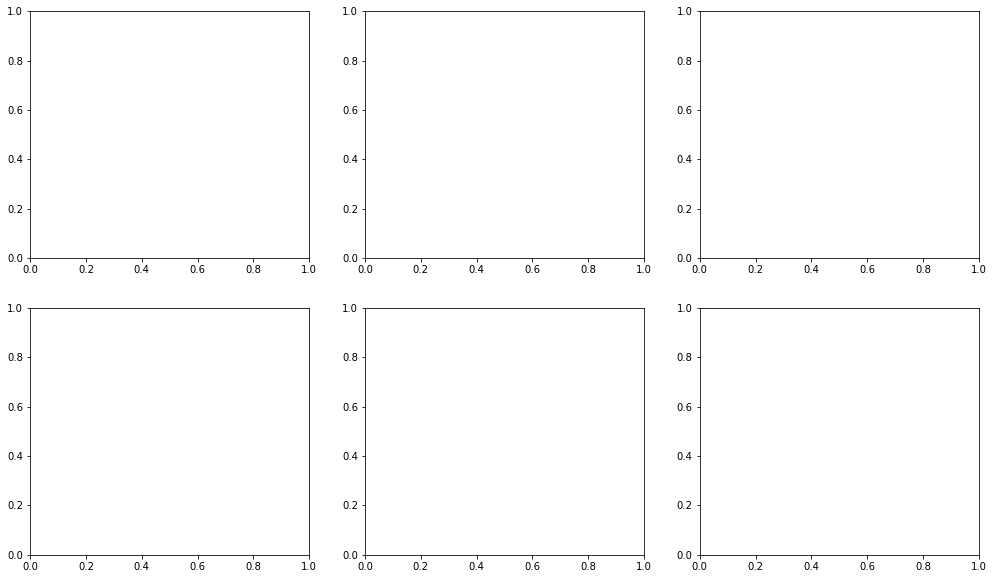

In [7]:
fig, axs = plt.subplots(2, 3, figsize = (17, 10))
